# FLIGHT DELAY PREDICTION

## 1. INTRODUCTION

## 1.1. Objectives and context

The objective of this project is to be able to predict if a flight will be delayed.
The model has been obtained from a real dataset of a Spanish car rental company from Mallorca. They wanted to know which flights were more likely to be delayed in order to rearrange their services.

## 1.2. Variables of the dataset

The variables that appear in the dataset are:

- id: Flight identification
- compania: It contains the initials of the flight company.
- numvuelo: Flight number. It normally contains 4 or 3 numbers but it can also contain a letter.
- iataaena: A code the airport uses, it is not relevant for our problem.
- fecha: Date of the flight.
- horaprogramada: Scheduled time of arrival of the flight.
- fechaestimada: Estimated date.
- horaestimada: Estimated arrival flight time.
- iataotro: Irrelevant
- estado: Irrelevant
- tipovuelo: Irrelevant 
- codigoscompania: Irrelevant 
- terminal: Irrelevant 
- tipoaeronave: Aircraft type
- cintaprimera: Irrelevant
- cintasegunda: Null
- salaprimera:Irrelevant
- salasegunda: Null
- ciudadiataotro:City of origin of the flight
- iatacompania:Used to identify the company name (Iberia is IB, Ryanair is FR, etc)
- oaciocompania: Similar to iatacompania
- nombrecompania: Name of the flight company
- iatascompaniasecundarios: Null
- oaciscompaniasecundarios: Null
- poicinta: Irrelevant
- hora_llegada: Actual time of arrival of the flight.

There are many irrelevant variables that we won't take into consideration.


## 1.3. Limitations

There is only available data of 2 months and a half.

# 2. DATASET

In [1]:
import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('C:\\Users\\Ihona\\Desktop\\Cursos\\ML_projects\\jupyter-example\\flight_info.csv')
df

,id,compania,numvuelo,iataaena,fecha,horaprogramada,fechaestimada,horaestimada,iataotro,estado,...,salaprimera,salasegunda,ciudadiataotro,iatacompania,oacicompania,nombrecompania,iatascompaniasecundarios,oaciscompaniasecundarios,poicinta,hora_llegada
0,UX5200110520231400GRANADA-JAÉN F.G.L.,UX,5200,PMI,2023-05-11,14:00:00,2023-05-11,14:03:00,GRX,IBK,...,NT,NaN,GRANADA-JAÉN F.G.L.,UX,AEA,Air Europa,NaN,NaN,1.049727e+12,14:35:53
1,EWG592090520230830KOELN/BONN,EWG,592,PMI,2023-05-09,08:30:00,2023-05-09,08:25:00,CGN,IBK,...,NT,NaN,KOELN/BONN,EW,EWG,Eurowings,NaN,NaN,1.049727e+12,08:40:53
2,EWG9584090520230830DUSSELDORF,EWG,9584,PMI,2023-05-09,08:30:00,2023-05-09,08:24:00,DUS,IBK,...,NT,NaN,DUSSELDORF,EW,EWG,Eurowings,NaN,NaN,1.049727e+12,08:40:53
3,TB1441090520230835OSTEND-BRUGES (OST),TB,1441,PMI,2023-05-09,08:35:00,2023-05-09,08:21:00,OST,IBK,...,NT,NaN,OSTEND-BRUGES (OST),TB,JAF,TUI FLY BELGIUM,NaN,NaN,1.049727e+12,08:40:53
4,RYR7831090520230845BRUSELAS /CHARLEROI,RYR,7831,PMI,2023-05-09,08:45:00,2023-05-09,08:28:00,CRL,IBK,...,NT,NaN,BRUSELAS /CHARLEROI,FR,RYR,Ryanair,NaN,NaN,1.233748e+12,08:40:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,TOM5674010720231720DURHAM TEES VALLEY,TOM,5674,PMI,2023-07-01,17:20:00,2023-07-01,17:18:00,MME,IBK,...,NT,NaN,DURHAM TEES VALLEY,BY,TOM,Tui Airways,NaN,NaN,1.049727e+12,17:30:21
24201,RYR5402010720231720NUREMBERG,RYR,5402,PMI,2023-07-01,17:20:00,2023-07-01,17:14:00,NUE,IBK,...,NT,NaN,NUREMBERG,FR,RYR,Ryanair,NaN,NaN,1.233748e+12,17:30:21
24202,EWG9576010720231730DUSSELDORF,EWG,9576,PMI,2023-07-01,17:30:00,2023-07-01,17:19:00,DUS,IBK,...,NT,NaN,DUSSELDORF,EW,EWG,Eurowings,NaN,NaN,1.049727e+12,17:30:21
24203,IB8507010720231730MENORCA,IB,8507,PMI,2023-07-01,17:30:00,2023-07-01,17:10:00,MAH,IBK,...,NT,NaN,MENORCA,IB,IBE,Iberia,NaN,NaN,1.049727e+12,17:30:21


# 3. DATA PREPARATION

The flight delay is obtained by assessing the difference between the actual arrival time and the estimated arrival time. 

In [3]:
#We keep the important variables

df1=df[['numvuelo', 'compania','nombrecompania','ciudadiataotro','tipoaeronave','fecha','horaestimada','hora_llegada']]
df1.head()  

,numvuelo,compania,nombrecompania,ciudadiataotro,tipoaeronave,fecha,horaestimada,hora_llegada
0,5200,UX,Air Europa,GRANADA-JAÉN F.G.L.,738W,2023-05-11,14:03:00,14:35:53
1,592,EWG,Eurowings,KOELN/BONN,A320,2023-05-09,08:25:00,08:40:53
2,9584,EWG,Eurowings,DUSSELDORF,A32A,2023-05-09,08:24:00,08:40:53
3,1441,TB,TUI FLY BELGIUM,OSTEND-BRUGES (OST),738W,2023-05-09,08:21:00,08:40:53
4,7831,RYR,Ryanair,BRUSELAS /CHARLEROI,738W,2023-05-09,08:28:00,08:40:53


In [4]:
#We convert day-time data into the correct format

df1['date'] = pd.to_datetime(df1['fecha'])
df1['Estimated_Time']=pd.to_datetime(df1['horaestimada'])
df1['Arrival_Time'] = pd.to_datetime(df1['hora_llegada'])

df1['day_of_week'] = df1['date'].dt.dayofweek + 1  # 1 is monday, 7 is sunday
df1['month_of_year'] = df1['date'].dt.month # 1 is January, 12 is December

In [5]:
import pandas as pd
import numpy as np

# Helper function to convert time string to minutes
def time_to_minutes(time_str):
    time_obj = pd.to_datetime(time_str).dt.time
    total_minutes = time_obj.apply(lambda x: x.hour * 60 + x.minute + x.second / 60)
    return total_minutes

# Convert time columns to minutes
df1['Estimated_Time_in_Minutes'] = time_to_minutes(df1['Estimated_Time']) 
df1['Arrival_Time_in_Minutes'] = time_to_minutes(df1['Arrival_Time'])

# Calculate the flight delay in minutes, considering the 24-hour offset for earlier arrivals
df1['delay_minutes'] = df1['Arrival_Time_in_Minutes'] - df1['Estimated_Time_in_Minutes']

# Adjust delay sign based on the actual arrival time
df1['delay_minutes'] = df1.apply(lambda row: row['delay_minutes'] + 1440 if row['Arrival_Time_in_Minutes'] < row['Estimated_Time_in_Minutes'] else row['delay_minutes'], axis=1)

print(df1)


      numvuelo compania   nombrecompania       ciudadiataotro tipoaeronave  \
0         5200       UX       Air Europa  GRANADA-JAÉN F.G.L.         738W   
1          592      EWG        Eurowings           KOELN/BONN         A320   
2         9584      EWG        Eurowings           DUSSELDORF         A32A   
3         1441       TB  TUI FLY BELGIUM  OSTEND-BRUGES (OST)         738W   
4         7831      RYR          Ryanair  BRUSELAS /CHARLEROI         738W   
...        ...      ...              ...                  ...          ...   
24200     5674      TOM      Tui Airways   DURHAM TEES VALLEY         738W   
24201     5402      RYR          Ryanair            NUREMBERG         738W   
24202     9576      EWG        Eurowings           DUSSELDORF         A320   
24203     8507       IB           Iberia              MENORCA         CRJX   
24204     1682      TOM      Tui Airways                 CORK         A320   

            fecha horaestimada hora_llegada       date      Est

We add a new feature to our dataframe: time_category, since the flight delay might be influenced by the time of the day it flies (morning, afternoon, etc)

In [6]:
import pandas as pd

# Assuming you have loaded the dataframe as df1
# Create a copy of the dataframe
df1_copy = df1.copy()

# Extract the hour from the "horaestimada" column
df1_copy["hour"] = pd.to_datetime(df1_copy["horaestimada"]).dt.hour

# Create a function to categorize the hours into the desired categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 1  # Morning
    elif 12 <= hour < 18:
        return 2  # Afternoon
    elif 18 <= hour < 22:
        return 3  # Evening
    else:
        return 4  # Night

# Apply the categorize_time function to the "hour" column to create the new category column
df1_copy["time_category"] = df1_copy["hour"].apply(categorize_time)

# Drop the original "horaestimada" and "hour" columns
df1_copy.drop(["horaestimada", "hour"], axis=1, inplace=True)

# Show the updated dataframe
print(df1_copy)

      numvuelo compania   nombrecompania       ciudadiataotro tipoaeronave  \
0         5200       UX       Air Europa  GRANADA-JAÉN F.G.L.         738W   
1          592      EWG        Eurowings           KOELN/BONN         A320   
2         9584      EWG        Eurowings           DUSSELDORF         A32A   
3         1441       TB  TUI FLY BELGIUM  OSTEND-BRUGES (OST)         738W   
4         7831      RYR          Ryanair  BRUSELAS /CHARLEROI         738W   
...        ...      ...              ...                  ...          ...   
24200     5674      TOM      Tui Airways   DURHAM TEES VALLEY         738W   
24201     5402      RYR          Ryanair            NUREMBERG         738W   
24202     9576      EWG        Eurowings           DUSSELDORF         A320   
24203     8507       IB           Iberia              MENORCA         CRJX   
24204     1682      TOM      Tui Airways                 CORK         A320   

            fecha hora_llegada       date      Estimated_Time  

In [7]:
df1=df1_copy
df1.head()

,numvuelo,compania,nombrecompania,ciudadiataotro,tipoaeronave,fecha,hora_llegada,date,Estimated_Time,Arrival_Time,day_of_week,month_of_year,Estimated_Time_in_Minutes,Arrival_Time_in_Minutes,delay_minutes,time_category
0,5200,UX,Air Europa,GRANADA-JAÉN F.G.L.,738W,2023-05-11,14:35:53,2023-05-11,2023-07-28 14:03:00,2023-07-28 14:35:53,4,5,843.0,875.883333,32.883333,2
1,592,EWG,Eurowings,KOELN/BONN,A320,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:25:00,2023-07-28 08:40:53,2,5,505.0,520.883333,15.883333,1
2,9584,EWG,Eurowings,DUSSELDORF,A32A,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:24:00,2023-07-28 08:40:53,2,5,504.0,520.883333,16.883333,1
3,1441,TB,TUI FLY BELGIUM,OSTEND-BRUGES (OST),738W,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:21:00,2023-07-28 08:40:53,2,5,501.0,520.883333,19.883333,1
4,7831,RYR,Ryanair,BRUSELAS /CHARLEROI,738W,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:28:00,2023-07-28 08:40:53,2,5,508.0,520.883333,12.883333,1


In [8]:
# Step 1: Determine which rows contain at least one letter
contains_letter = df1['numvuelo'].str.contains(r'[a-zA-Z]', na=False, regex=True)

# Step 2: Count the number of rows that contain at least one letter
num_rows_with_letter = contains_letter.sum()

# Step 3: Calculate the percentage
total_rows = len(df1)
percentage_with_letter = (num_rows_with_letter / total_rows) * 100

print(f"Percentage of rows with at least one letter in 'numvuelo': {percentage_with_letter:.2f}%")

Percentage of rows with at least one letter in 'numvuelo': 0.04%


We see that numvuelo contains some letters, but since the % is really low, we can delete them. 

We create a new binary column that indicates the delay. If a flight is late more than 10 minutes, we will consider this flight as a delayed flight (1). Otherwise, there will be a 0. 

In [9]:
# Create the new binary column "delay"
df1["delay"] = (df1["delay_minutes"] > 10).astype(int)

In [10]:
df1.head()

,numvuelo,compania,nombrecompania,ciudadiataotro,tipoaeronave,fecha,hora_llegada,date,Estimated_Time,Arrival_Time,day_of_week,month_of_year,Estimated_Time_in_Minutes,Arrival_Time_in_Minutes,delay_minutes,time_category,delay
0,5200,UX,Air Europa,GRANADA-JAÉN F.G.L.,738W,2023-05-11,14:35:53,2023-05-11,2023-07-28 14:03:00,2023-07-28 14:35:53,4,5,843.0,875.883333,32.883333,2,1
1,592,EWG,Eurowings,KOELN/BONN,A320,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:25:00,2023-07-28 08:40:53,2,5,505.0,520.883333,15.883333,1,1
2,9584,EWG,Eurowings,DUSSELDORF,A32A,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:24:00,2023-07-28 08:40:53,2,5,504.0,520.883333,16.883333,1,1
3,1441,TB,TUI FLY BELGIUM,OSTEND-BRUGES (OST),738W,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:21:00,2023-07-28 08:40:53,2,5,501.0,520.883333,19.883333,1,1
4,7831,RYR,Ryanair,BRUSELAS /CHARLEROI,738W,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:28:00,2023-07-28 08:40:53,2,5,508.0,520.883333,12.883333,1,1


In [11]:
#The percentage of rows that contain at leat one letter is super low, so we can directly delete those rows:
df1 = df1[df1['numvuelo'].str.contains(r'[a-zA-Z]', na=False, regex=True) == False]

In [12]:
# Assuming that the column 'ciudadiataotro' looks like this:
# 'New York - John F. Kennedy International Airport'
# 'Los Angeles / LAX'

# Extract the city name from the 'ciudadiataotro' column
df1['city'] = df1['ciudadiataotro'].str.split(r'-|/', n=1).str[0].str.strip()

# Now the 'city' column contains only the city names
print(df1[['ciudadiataotro', 'city']])

            ciudadiataotro                city
0      GRANADA-JAÉN F.G.L.             GRANADA
1               KOELN/BONN               KOELN
2               DUSSELDORF          DUSSELDORF
3      OSTEND-BRUGES (OST)              OSTEND
4      BRUSELAS /CHARLEROI            BRUSELAS
...                    ...                 ...
24200   DURHAM TEES VALLEY  DURHAM TEES VALLEY
24201            NUREMBERG           NUREMBERG
24202           DUSSELDORF          DUSSELDORF
24203              MENORCA             MENORCA
24204                 CORK                CORK

[24196 rows x 2 columns]


In [13]:
numeric_var = ["numvuelo","Estimated_Time_in_Minutes","Arrival_Time_in_Minutes"]
numeric_axis_name = ['Flight number','Estimated Time (Minutes)', 'Arrival Time (Minutes)']

In [14]:
#Categorical variables are used to represent data that falls into specific categories or groups. 

categoric_var = ["compania","day_of_week","month_of_year", "city", "tipoaeronave","delay"]
categoric_axis_name=["Company","Day of the week","Month of the year", "Name of the city of origin", "Type of aircraft","Time delay" ]

In [15]:
df1[numeric_var].describe() 

,Estimated_Time_in_Minutes,Arrival_Time_in_Minutes
count,24196.000000,24182.000000
mean,881.960572,879.069643
std,325.233534,334.863962
min,0.000000,0.333333
25%,635.000000,640.833333
50%,889.000000,888.900000
75%,1155.000000,1160.350000
max,1439.000000,1439.533333


## 3.1. Exploratory Data Analysis

Let's see the distribution of our data. 

- For the numerical variables of interest:

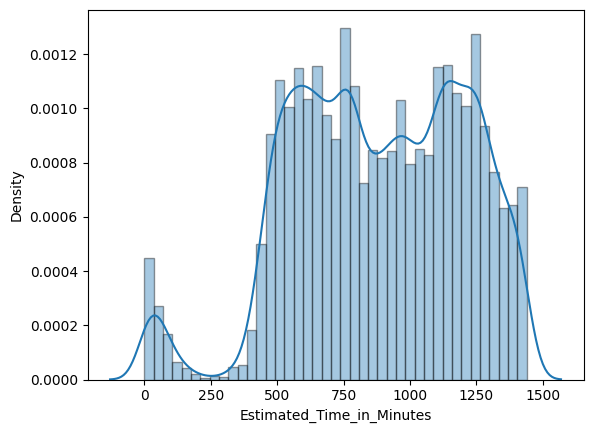

In [17]:
sns.distplot(df1["Estimated_Time_in_Minutes"], hist_kws = dict(linewidth = 1, edgecolor = "k"));

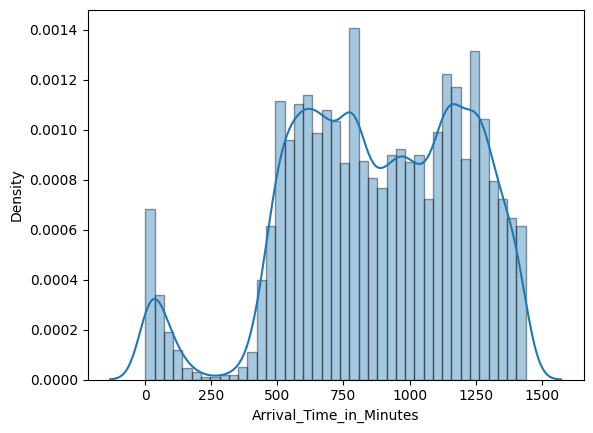

In [18]:
sns.distplot(df1["Arrival_Time_in_Minutes"], hist_kws = dict(linewidth = 1, edgecolor = "k"));

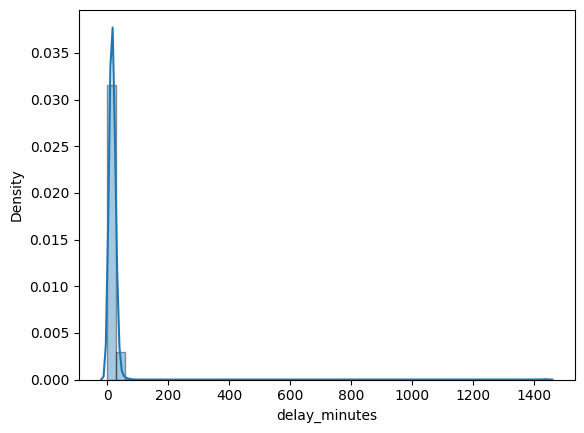

In [19]:
sns.distplot(df1["delay_minutes"], hist_kws=dict(linewidth=1, edgecolor="k"))
plt.show()

We can see that the distribution of the data doesn't follow a symetric distribution in any case. 

- For the categorical variables of interest:

In [20]:
df1["day_of_week"].value_counts() #The first columns are the values that appear and the second the frequency of those values

day_of_week
6    3852
3    3612
5    3507
2    3401
4    3377
7    3251
1    3196
Name: count, dtype: int64

In [21]:
df1["month_of_year"].value_counts()

month_of_year
6    13568
5    10369
7      259
Name: count, dtype: int64

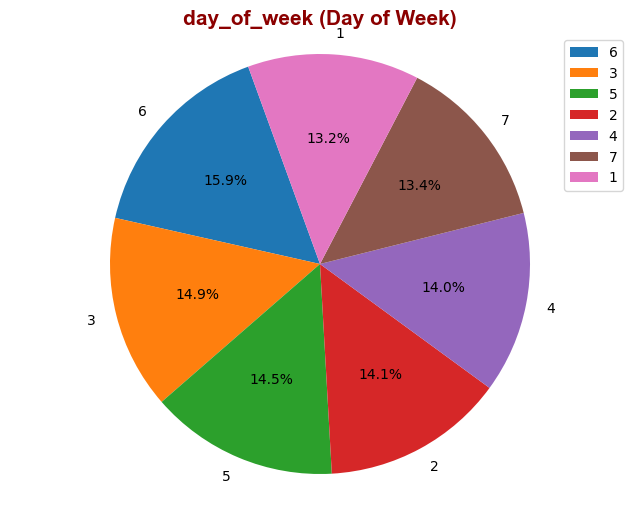

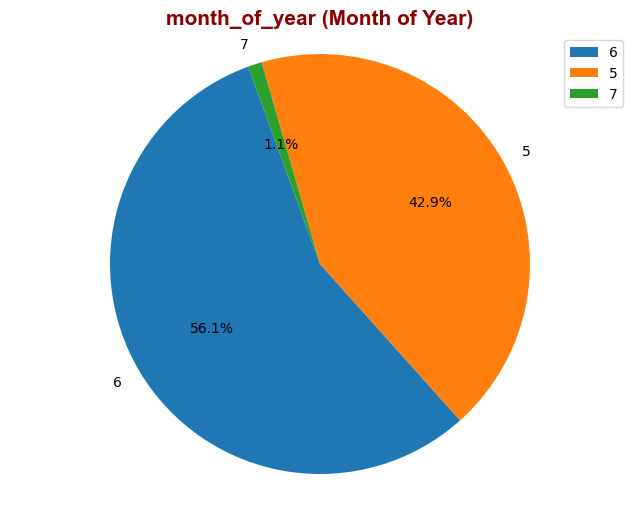

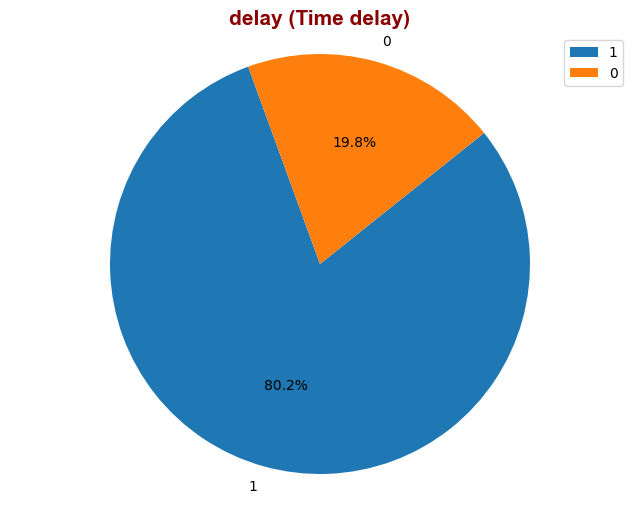

In [22]:
import matplotlib.pyplot as plt

title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}

#We want only to represent these 2 categorical variables:

categoric_var = ["day_of_week", "month_of_year","delay"]
categoric_axis_name = ["Day of Week", "Month of Year","Time delay"]  #1=yes, 0=no

for i, z in zip(categoric_var, categoric_axis_name):
    fig, ax = plt.subplots(figsize=(8, 6))

    observation_values = list(df1[i].value_counts().index)
    total_observation_values = list(df1[i].value_counts())

    ax.pie(total_observation_values, labels=observation_values, autopct='%1.1f%%', startangle=110, labeldistance=1.1)
    ax.axis("equal")

    plt.title((i + " (" + z + ")"), fontdict=title_font)
    plt.legend()
    plt.show()


#### Correlation between numerical variables

Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two or more variables. It ranges from -1 to +1, where +1 represents a perfect positive correlation (variables move in the same direction), -1 indicates a perfect negative correlation (variables move in opposite directions), and 0 signifies no linear relationship. It's essential to note that correlation only captures linear relationships and not other types of associations, such as nonlinear patterns.

In [23]:
df1_new=df1[["Estimated_Time_in_Minutes", "day_of_week","month_of_year","delay_minutes", "numvuelo", "time_category"]]
df1_new.corr()

,Estimated_Time_in_Minutes,day_of_week,month_of_year,delay_minutes,numvuelo,time_category
Estimated_Time_in_Minutes,1.000000,0.001258,-0.020470,-0.005245,0.051005,0.586378
day_of_week,0.001258,1.000000,0.056292,0.019503,-0.011896,-0.013157
month_of_year,-0.020470,0.056292,1.000000,0.012633,-0.023579,-0.021825
delay_minutes,-0.005245,0.019503,0.012633,1.000000,-0.003269,0.002287
numvuelo,0.051005,-0.011896,-0.023579,-0.003269,1.000000,0.092041
time_category,0.586378,-0.013157,-0.021825,0.002287,0.092041,1.000000


<Axes: >

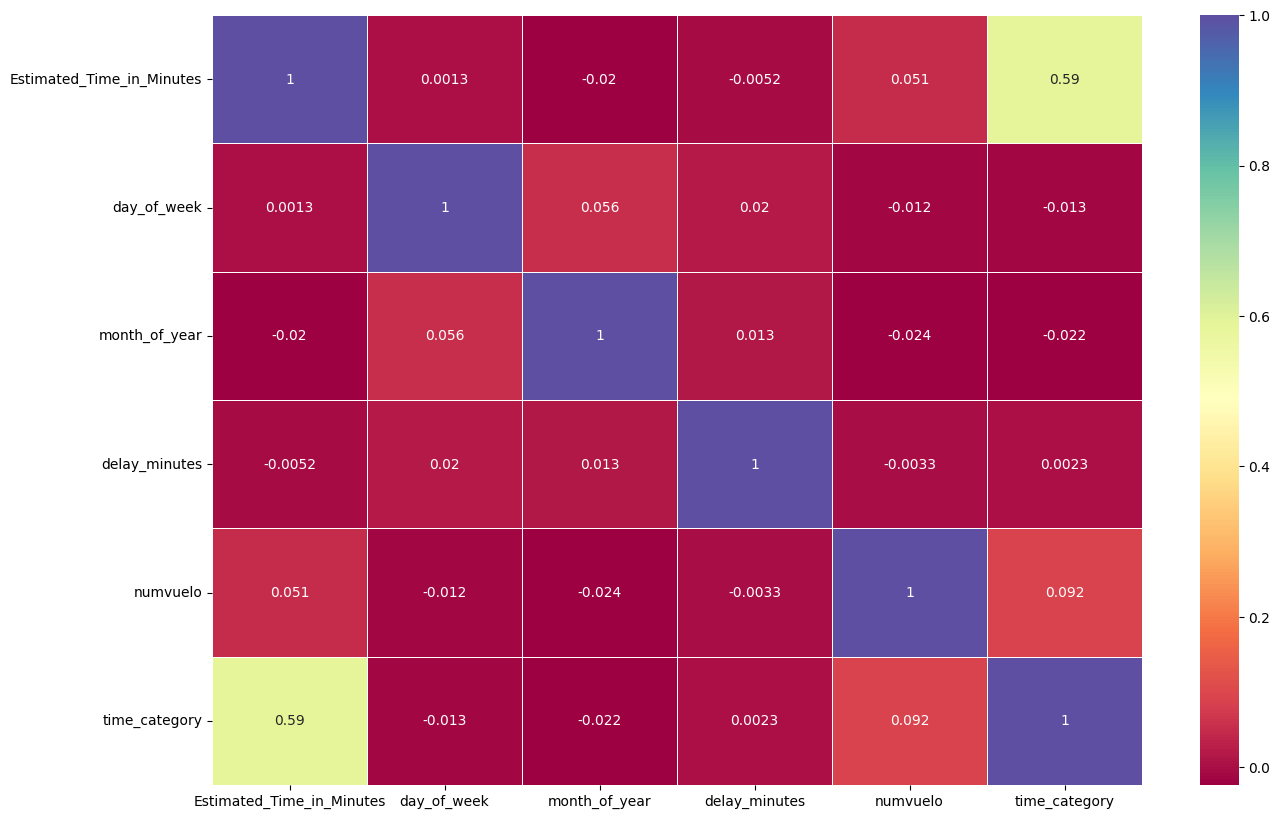

In [24]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df1_new.corr(), cmap = "Spectral", annot = True, linewidths = 0.5) #annot = True prints the corr coeff

# 4. PREPARATION FOR MODELLING ML

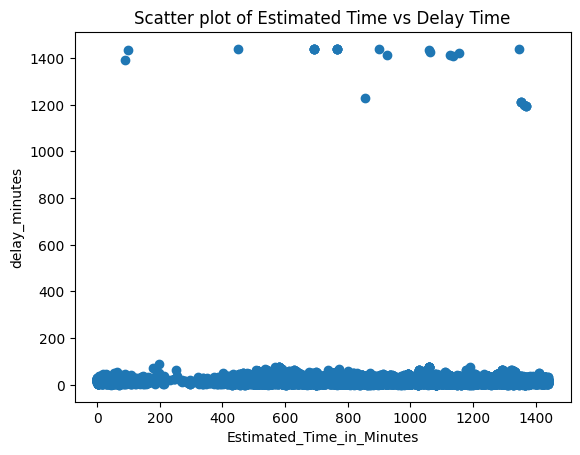

In [16]:
#Scatter plot to detect outliers and see the data tendency
plt.scatter(df1['Estimated_Time_in_Minutes'], df1['delay_minutes'])
plt.xlabel('Estimated_Time_in_Minutes')
plt.ylabel('delay_minutes')
plt.title('Scatter plot of Estimated Time vs Delay Time')
plt.show()

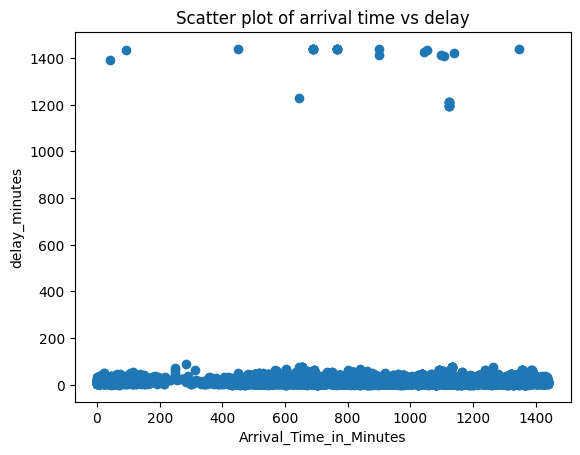

In [25]:
plt.scatter(df1['Arrival_Time_in_Minutes'], df1['delay_minutes'])
plt.xlabel('Arrival_Time_in_Minutes')
plt.ylabel('delay_minutes')
plt.title('Scatter plot of arrival time vs delay')
plt.show()

In [26]:
#We filter the outliers by deleting the flights that are delayed for more than 60 minutes.

df1 = df1[(df1['delay_minutes'] > -10) & (df1['delay_minutes'] < 60)] #We filter the outliers
df1.head()

,numvuelo,compania,nombrecompania,ciudadiataotro,tipoaeronave,fecha,hora_llegada,date,Estimated_Time,Arrival_Time,day_of_week,month_of_year,Estimated_Time_in_Minutes,Arrival_Time_in_Minutes,delay_minutes,time_category,delay,city
0,5200,UX,Air Europa,GRANADA-JAÉN F.G.L.,738W,2023-05-11,14:35:53,2023-05-11,2023-07-28 14:03:00,2023-07-28 14:35:53,4,5,843.0,875.883333,32.883333,2,1,GRANADA
1,592,EWG,Eurowings,KOELN/BONN,A320,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:25:00,2023-07-28 08:40:53,2,5,505.0,520.883333,15.883333,1,1,KOELN
2,9584,EWG,Eurowings,DUSSELDORF,A32A,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:24:00,2023-07-28 08:40:53,2,5,504.0,520.883333,16.883333,1,1,DUSSELDORF
3,1441,TB,TUI FLY BELGIUM,OSTEND-BRUGES (OST),738W,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:21:00,2023-07-28 08:40:53,2,5,501.0,520.883333,19.883333,1,1,OSTEND
4,7831,RYR,Ryanair,BRUSELAS /CHARLEROI,738W,2023-05-09,08:40:53,2023-05-09,2023-07-28 08:28:00,2023-07-28 08:40:53,2,5,508.0,520.883333,12.883333,1,1,BRUSELAS


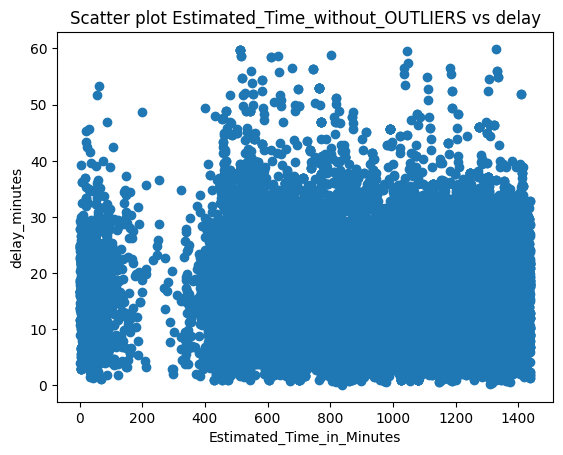

In [27]:
#Scatter plot to see if we correctly deleted outliers:

plt.scatter(df1['Estimated_Time_in_Minutes'], df1['delay_minutes'])
plt.xlabel('Estimated_Time_in_Minutes')
plt.ylabel('delay_minutes')
plt.title('Scatter plot Estimated_Time_without_OUTLIERS vs delay')
plt.show()

Now that the outliers have been deleted, we will extract information about the delays. A mean of the delay for each company has been made. There are two tables, in the first one the companies appear in alphabetic order and in the second the table is sorted from the company that has the most time delay mean to the least.

In [28]:
import pandas as pd

# Assuming you have a DataFrame named df with columns 'compania' and 'time_delay'
# Group by 'compania' and calculate the mean of 'time_delay' for each flight company
mean_delay_by_company = df1.groupby('nombrecompania')['delay_minutes'].mean().reset_index()

# Rename the 'time_delay' column to 'mean_time_delay'
mean_delay_by_company = mean_delay_by_company.rename(columns={'delay_minutes': 'mean_time_delay'})

print(mean_delay_by_company)

           nombrecompania  mean_time_delay
0         Aegean Airlines        20.337500
1              Aer Lingus        17.532609
2   Aerolíneas Argentinas        17.671631
3              Aeromexico        17.604780
4        Air Arabia Maroc        18.245455
..                    ...              ...
87   Wizz Air Malta (WMT)        23.604167
88                easyJet        17.233431
89    easyJet Switzerland        16.117857
90             easyJet UK        17.309185
91     sata-internacional        26.504762

[92 rows x 2 columns]


In [29]:
# Sort the DataFrame by mean_delay in descending order
mean_delay_by_company_sorted = mean_delay_by_company.sort_values(by='mean_time_delay', ascending=False)

# Print the sorted DataFrame
print(mean_delay_by_company_sorted)

                nombrecompania  mean_time_delay
12   Altenrhein Luftfahrt Gmbh        27.555556
91          sata-internacional        26.504762
85  Wideroe´s Flyveselskap A/S        25.333333
40                Hisky Europe        23.686667
87        Wizz Air Malta (WMT)        23.604167
..                         ...              ...
27          Copenhagen Airtaxi        14.251190
73                       Tarom        13.906818
44                      Israir        10.850000
15            Atlantic Airways        10.341667
45                 JSC Klasjet         3.850000

[92 rows x 2 columns]


In [30]:
import pandas as pd
from tabulate import tabulate

# Assuming you have the mean_delay_by_company DataFrame from the previous code

# Convert the DataFrame to a list of lists
table_data = mean_delay_by_company_sorted.values.tolist()

# Define the table headers
headers = mean_delay_by_company_sorted.columns.tolist()

# Use the tabulate function to create the table
table = tabulate(table_data, headers=headers, tablefmt='pretty')

# Print the table
print(table)


+---------------------------------+--------------------+
|         nombrecompania          |  mean_time_delay   |
+---------------------------------+--------------------+
|    Altenrhein Luftfahrt Gmbh    | 27.55555555555556  |
|       sata-internacional        | 26.504761904761917 |
|   Wideroe´s Flyveselskap A/S    | 25.333333333333258 |
|          Hisky Europe           | 23.686666666666667 |
|      Wizz Air Malta (WMT)       | 23.604166666666657 |
|        Brussels Airways         | 22.741666666666703 |
|            Fly Play             | 20.759999999999945 |
|         Binter Canarias         | 20.364646464646466 |
|         Aegean Airlines         | 20.337500000000034 |
|        Air Horizont LTD         | 20.33333333333337  |
|           Air Baltic            | 19.554761904761904 |
|        TAP Air Portugal         | 19.29702380952381  |
|        Helvetic Airways         | 19.275757575757563 |
|     Arkia Israeli Airlines      | 19.15833333333333  |
|         Cathay Pacific       

## 4.1. LABEL ENCODING FOR CATEGORICAL VARIABLES

The machine learning algorithm can only be trained with numeric features, so we have to convert some of our variables into the correct format.

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have loaded the dataframe as df1

# Create a copy of the dataframe
df1_copy = df1.copy()

# Apply label encoding to the "tipoaeronave" column
le_tipoaeronave = LabelEncoder()
df1_copy["tipoaeronave_encoded"] = le_tipoaeronave.fit_transform(df1_copy["tipoaeronave"])

# Apply label encoding to the "compania" column
le_compania = LabelEncoder()
df1_copy["compania_encoded"] = le_compania.fit_transform(df1_copy["compania"])

# Apply label encoding to the "city" of origin column:
le_city = LabelEncoder()
df1_copy["city_encoded"] = le_city.fit_transform(df1_copy["city"])


# Drop the original "tipoaeronave", "compania", and "city" columns
df1_copy.drop(["tipoaeronave", "compania", "city"], axis=1, inplace=True)

# Show the updated dataframe
print(df1_copy)

      numvuelo   nombrecompania       ciudadiataotro       fecha hora_llegada  \
0         5200       Air Europa  GRANADA-JAÉN F.G.L.  2023-05-11     14:35:53   
1          592        Eurowings           KOELN/BONN  2023-05-09     08:40:53   
2         9584        Eurowings           DUSSELDORF  2023-05-09     08:40:53   
3         1441  TUI FLY BELGIUM  OSTEND-BRUGES (OST)  2023-05-09     08:40:53   
4         7831          Ryanair  BRUSELAS /CHARLEROI  2023-05-09     08:40:53   
...        ...              ...                  ...         ...          ...   
24200     5674      Tui Airways   DURHAM TEES VALLEY  2023-07-01     17:30:21   
24201     5402          Ryanair            NUREMBERG  2023-07-01     17:30:21   
24202     9576        Eurowings           DUSSELDORF  2023-07-01     17:30:21   
24203     8507           Iberia              MENORCA  2023-07-01     17:30:21   
24204     1682      Tui Airways                 CORK  2023-07-01     17:30:21   

            date      Estim

In [32]:

df1=df1_copy[['numvuelo', 'compania_encoded','tipoaeronave_encoded','city_encoded','Estimated_Time_in_Minutes','day_of_week','month_of_year','time_category','delay']]
df1.head()  

,numvuelo,compania_encoded,tipoaeronave_encoded,city_encoded,Estimated_Time_in_Minutes,day_of_week,month_of_year,time_category,delay
0,5200,99,2,60,843.0,4,5,2,1
1,592,40,10,82,505.0,2,5,1,1
2,9584,40,12,44,504.0,2,5,1,1
3,1441,90,2,123,501.0,2,5,1,1
4,7831,84,2,29,508.0,2,5,1,1


In [33]:
import pandas as pd

# Assuming you already have the DataFrame df1

# Check if there are any null values in df1
if df1.isnull().any().any():
    print("There are null values in df1.")
else:
    print("There are no null values in df1.")


There are no null values in df1.


##### Test and training set

We have to divide our data into the test set and the training set to train and then test the models.

In [37]:
from sklearn.model_selection import train_test_split

In [44]:
X = df1.drop(["delay"], axis = 1)
y = df1[["delay"]] #variable that we want to predict

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [46]:
X_train.head()

,numvuelo,compania_encoded,tipoaeronave_encoded,city_encoded,Estimated_Time_in_Minutes,day_of_week,month_of_year,time_category
7519,2347,84,21,113,743.0,4,5,2
1606,8531,53,37,68,1262.0,7,5,3
19779,6918,35,8,98,524.0,4,6,1
3156,4014,99,2,158,1079.0,1,5,2
9242,027,84,21,94,892.0,7,5,2


In [47]:
y_train.head()

,delay
7519,1
1606,1
19779,1
3156,0
9242,0


# 5. PREPARATION FOR MODELLING ML

## 5.1 LOGISTIC REGRESION

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [25]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = log_reg.predict(X_test) 

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8049792531120332


In [28]:
#Cross validation

from sklearn.model_selection import cross_val_score

In [29]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8049792531120332


## 5.2. DECISION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dec_tree = DecisionTreeClassifier(random_state = 5) #We create the model object

In [35]:
dec_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5)

In [36]:
y_pred = dec_tree.predict(X_test)

In [37]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.75850622406639


In [38]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.674688796680498


## 5.3 SUPPORT VECTOR MACHINE

In [49]:
from sklearn.svm import SVC

In [40]:
svc_model = SVC(random_state = 5)

In [41]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [42]:
y_pred = svc_model.predict(X_test)

In [43]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8049792531120332


In [44]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8049792531120332


## 5.4. RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
random_forest = RandomForestClassifier(random_state = 5)


In [47]:
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=5)

In [48]:
y_pred = random_forest.predict(X_test)


In [49]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.7531120331950207


We will try to optimize the hyperparameters of random forest to improve the accuracy.

In [50]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [51]:
# n_estimators: number of trees
#criterion: measures the quality in splitting the tree
#max_features

parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}


In [54]:
from sklearn.model_selection import GridSearchCV
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [55]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [56]:
print("Best Parameters:", random_forest_grid.best_params_)


Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 200}


In [57]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "log2", n_estimators = 200, random_state = 5)

In [58]:
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200, random_state=5)

In [59]:
y_pred = random_forest_new2.predict(X_test)

In [60]:
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest after hyper-parameter tuning is: 0.7680497925311204


# 6. CONCLUSION

The best resuts have been otained using the logistic regression (Test Accuracy: 0.8049). The cross-validation indicates that there is no overfitting of the data. Overall, we have achieved a pretty decent model and from now on we will be able to predict the delay of a flight thanks to this model. 